In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

from run_qca import run_qca
from process_response import process_response
from parse_qca import parse_qca

In [2]:
def parse_cross_csv(reader):
    time = []
    spectrum_data = []

    for row in reader:
        time.append(float(row[0]))

        spectrum = []
        for i in range(2,len(row)):
            spectrum.append(float(row[i]))
        spectrum_data.append(spectrum)

    time =  np.array(time)
    spectrum_data = np.array(spectrum_data)
    spectrum_data = np.transpose(spectrum_data)

    return time, spectrum_data

E1-Eground:0.0538129913047
E1-Eground:0.106203799819


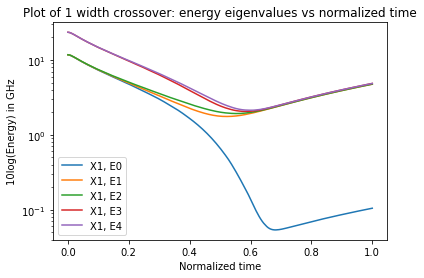

In [3]:
xing1 = open('crossover/xover_1.csv', mode='r', encoding='utf-8-sig')
xing3 = open('crossover/xover_3.csv', mode='r', encoding='utf-8-sig')
xing1_reader = csv.reader(xing1)
xing3_reader = csv.reader(xing3)

time_1, spectrum_data_1 = parse_cross_csv(xing1_reader)
time_3, spectrum_data_3 = parse_cross_csv(xing3_reader)

fig = plt.figure()
ax = plt.subplot(111)

for spectrum in range(len(spectrum_data_1)):
    ax.semilogy(time_1, spectrum_data_1[spectrum], label='X1, E'+ str(spectrum))

min_1=np.min(spectrum_data_1[0])
print("E1-Eground:"+ str(min_1))    

# for spectrum in range(len(spectrum_data_3)):
#     ax.semilogy(time_3, spectrum_data_3[spectrum],label='X3, E'+ str(spectrum))

min_3=np.min(spectrum_data_3[0])
print("E1-Eground:"+ str(min_3))

plt.title('Plot of 1 width crossover: energy eigenvalues vs normalized time')
ax.legend()
plt.xlabel("Normalized time")
plt.ylabel("10log(Energy) in GHz")
plt.show()

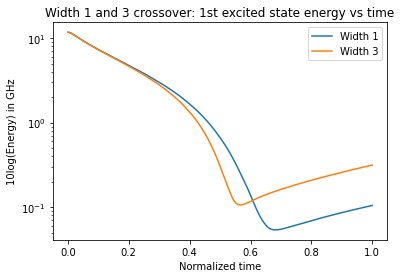

In [4]:
fig = plt.figure()
ax = plt.subplot(111)
ax.semilogy(time_1, spectrum_data_1[0], label= 'Width 1')
ax.semilogy(time_3, spectrum_data_3[0], label= 'Width 3')

plt.title('Width 1 and 3 crossover: 1st excited state energy vs time')
ax.legend()
plt.xlabel("Normalized time")
plt.ylabel("10log(Energy) in GHz")
plt.show()

Circuit information extracted from circuit parser
13
Constructing BQM...
Choosing solver...
Choosing D-Wave QPU as sampler...
Problem completed from selected sampler.
ground energy is  -11.75


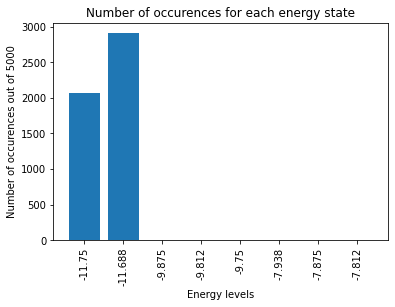

percent of output 0 correct in ground state: 1.0
percent of output 0 correct overall: 0.9984
percent of output 1 correct in ground state: 0.0
percent of output 1 correct overall: 0.583
Circuit information extracted from circuit parser
21
Constructing BQM...
Choosing solver...
Choosing D-Wave QPU as sampler...
Problem completed from selected sampler.
ground energy is  -18.917893218813454


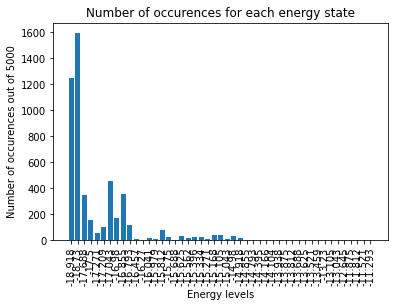

percent of output 0 correct in ground state: 1.0
percent of output 0 correct overall: 0.8374
percent of output 1 correct in ground state: 0.0
percent of output 1 correct overall: 0.6046


In [15]:
num_reads = 5000
drivers, inputs, cells, output_cell_index = parse_qca('CIRCUITS/COPA1')
response = run_qca(drivers, inputs, cells, output_cell_index, [1,1], False, num_reads)
process_response(response, output_cell_index, [1,1], num_reads)

drivers, inputs, cells, output_cell_index = parse_qca('CIRCUITS/COP3')
response = run_qca(drivers, inputs, cells, output_cell_index, [1,1], False, num_reads)
process_response(response, output_cell_index, [1,1], num_reads)

# drivers, inputs, cells, output_cell_index = parse_qca('CIRCUITS/COP5')
# response = run_qca(drivers, inputs, cells, output_cell_index, [1,1], False, num_reads)
# process_response(response, output_cell_index, [1,1], num_reads)